In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys

In [10]:
transactions = pd.read_csv('hist_trx.csv')
transactions0 = pd.read_csv('hits0712.csv')
MCC = pd.read_excel('Типы_MCC.XLSX')

### Транзакции:

In [5]:
transactions.head(2)

Unnamed: 0                          event_id            date_time  \
0           0  22c9f1ac686a43e18cdb798489193238  2018-12-06 09:33:21   
1           1  62dac13fac68416d9bc340c51ddcb977  2018-12-06 09:36:08   

     user_id      sub_channel event_type      sub_type  atm_mcc mcc_group  \
0  102050167  ISSUER_ACQUIRER    PAYMENT  POS_PURCHASE   5921.0         R   
1  102050167  ISSUER_ACQUIRER    PAYMENT  POS_PURCHASE   5331.0         R   

  atm_merchant_name  amount  
0           YUG 426   280.0  
1    MAGAZIN RODINA   376.9

In [335]:
transactions0.head()

event_id   user_id  rec_user_id  \
0  0fcea7fec4ff479cac8cf37b4555c817  75301207     49913000   
1  c29a4e64d27b435b9b55aa3e62ce54d4   1200695     12797310   
2  3107b2b1afcb490ab0a31135eb4b386c  45657780     23814017   
3  d9bc95d991144d53b950d8084fa846bf  21683486      9865131   
4  9fc959da4cd144ea8bf5bae2dc041a5e   4531894  VSP15472255   

             date_time resolution sub_channel  
0  2018-12-07 07:56:49          G      ATMAPI  
1  2018-12-07 07:14:41          G   MOBILEAPI  
2  2018-12-07 14:02:30          G   MOBILEAPI  
3  2018-12-07 10:32:41          G      WEBAPI  
4  2018-12-07 18:22:52          G   MOBILEAPI

In [147]:
fig, ax = plt.subplots(nrows=2,ncols=2, figsize = (60,20))
transactions.sub_channel.hist(ax=ax[0][0])
transactions.event_type.hist(figsize=(15,5), ax=ax[0][1])
transactions.sub_type.hist(xlabelsize=10, xrot=90,figsize=(15,5),bins=transactions.sub_type.nunique(), ax = ax[1][0])
transactions.mcc_group.hist(figsize=(15,5), bins=transactions.mcc_group.nunique(), ax = ax[1][1])

<Figure size 4320x1440 with 0 Axes>

### Есть смысл посмотреть на распределение этих признаков в классах genue и fraud

In [165]:
fraud_users = transactions0[transactions0.resolution!='G'].user_id
fraud_rec_users = transactions0[transactions0.resolution!='G'].rec_user_id
genue_users = np.hstack((transactions0[transactions0.resolution =='G'].user_id,transactions0[transactions0.resolution =='G'].rec_user_id))
genue_users = set(genue_users)

In [167]:
tr_fr = transactions[transactions.user_id.isin(fraud_users)]
tr_rc_fr = transactions[transactions.user_id.isin(fraud_rec_users)]
tr_gn = transactions[transactions.user_id.isin(genue_users)]

In [490]:
fig, ax = plt.subplots(nrows=3, figsize =(40, 15))
tr_gn.sub_channel.sort_values().hist(color='r', ax= ax[0])
tr_rc_fr.sub_channel.sort_values().hist(color ='g', ax = ax[1])
tr_fr.sub_channel.sort_values().hist(ax = ax[2])

In [189]:
fig, ax = plt.subplots(nrows=3, figsize =(20, 10))
tr_gn.event_type.sort_values().hist(color='r', ax= ax[0], bins = tr_gn.event_type.nunique())
tr_rc_fr.event_type.sort_values().hist(color ='g', ax = ax[1], bins = tr_rc_fr.event_type.nunique())
tr_fr.event_type.sort_values().hist(ax = ax[2], bins = tr_fr.event_type.nunique())

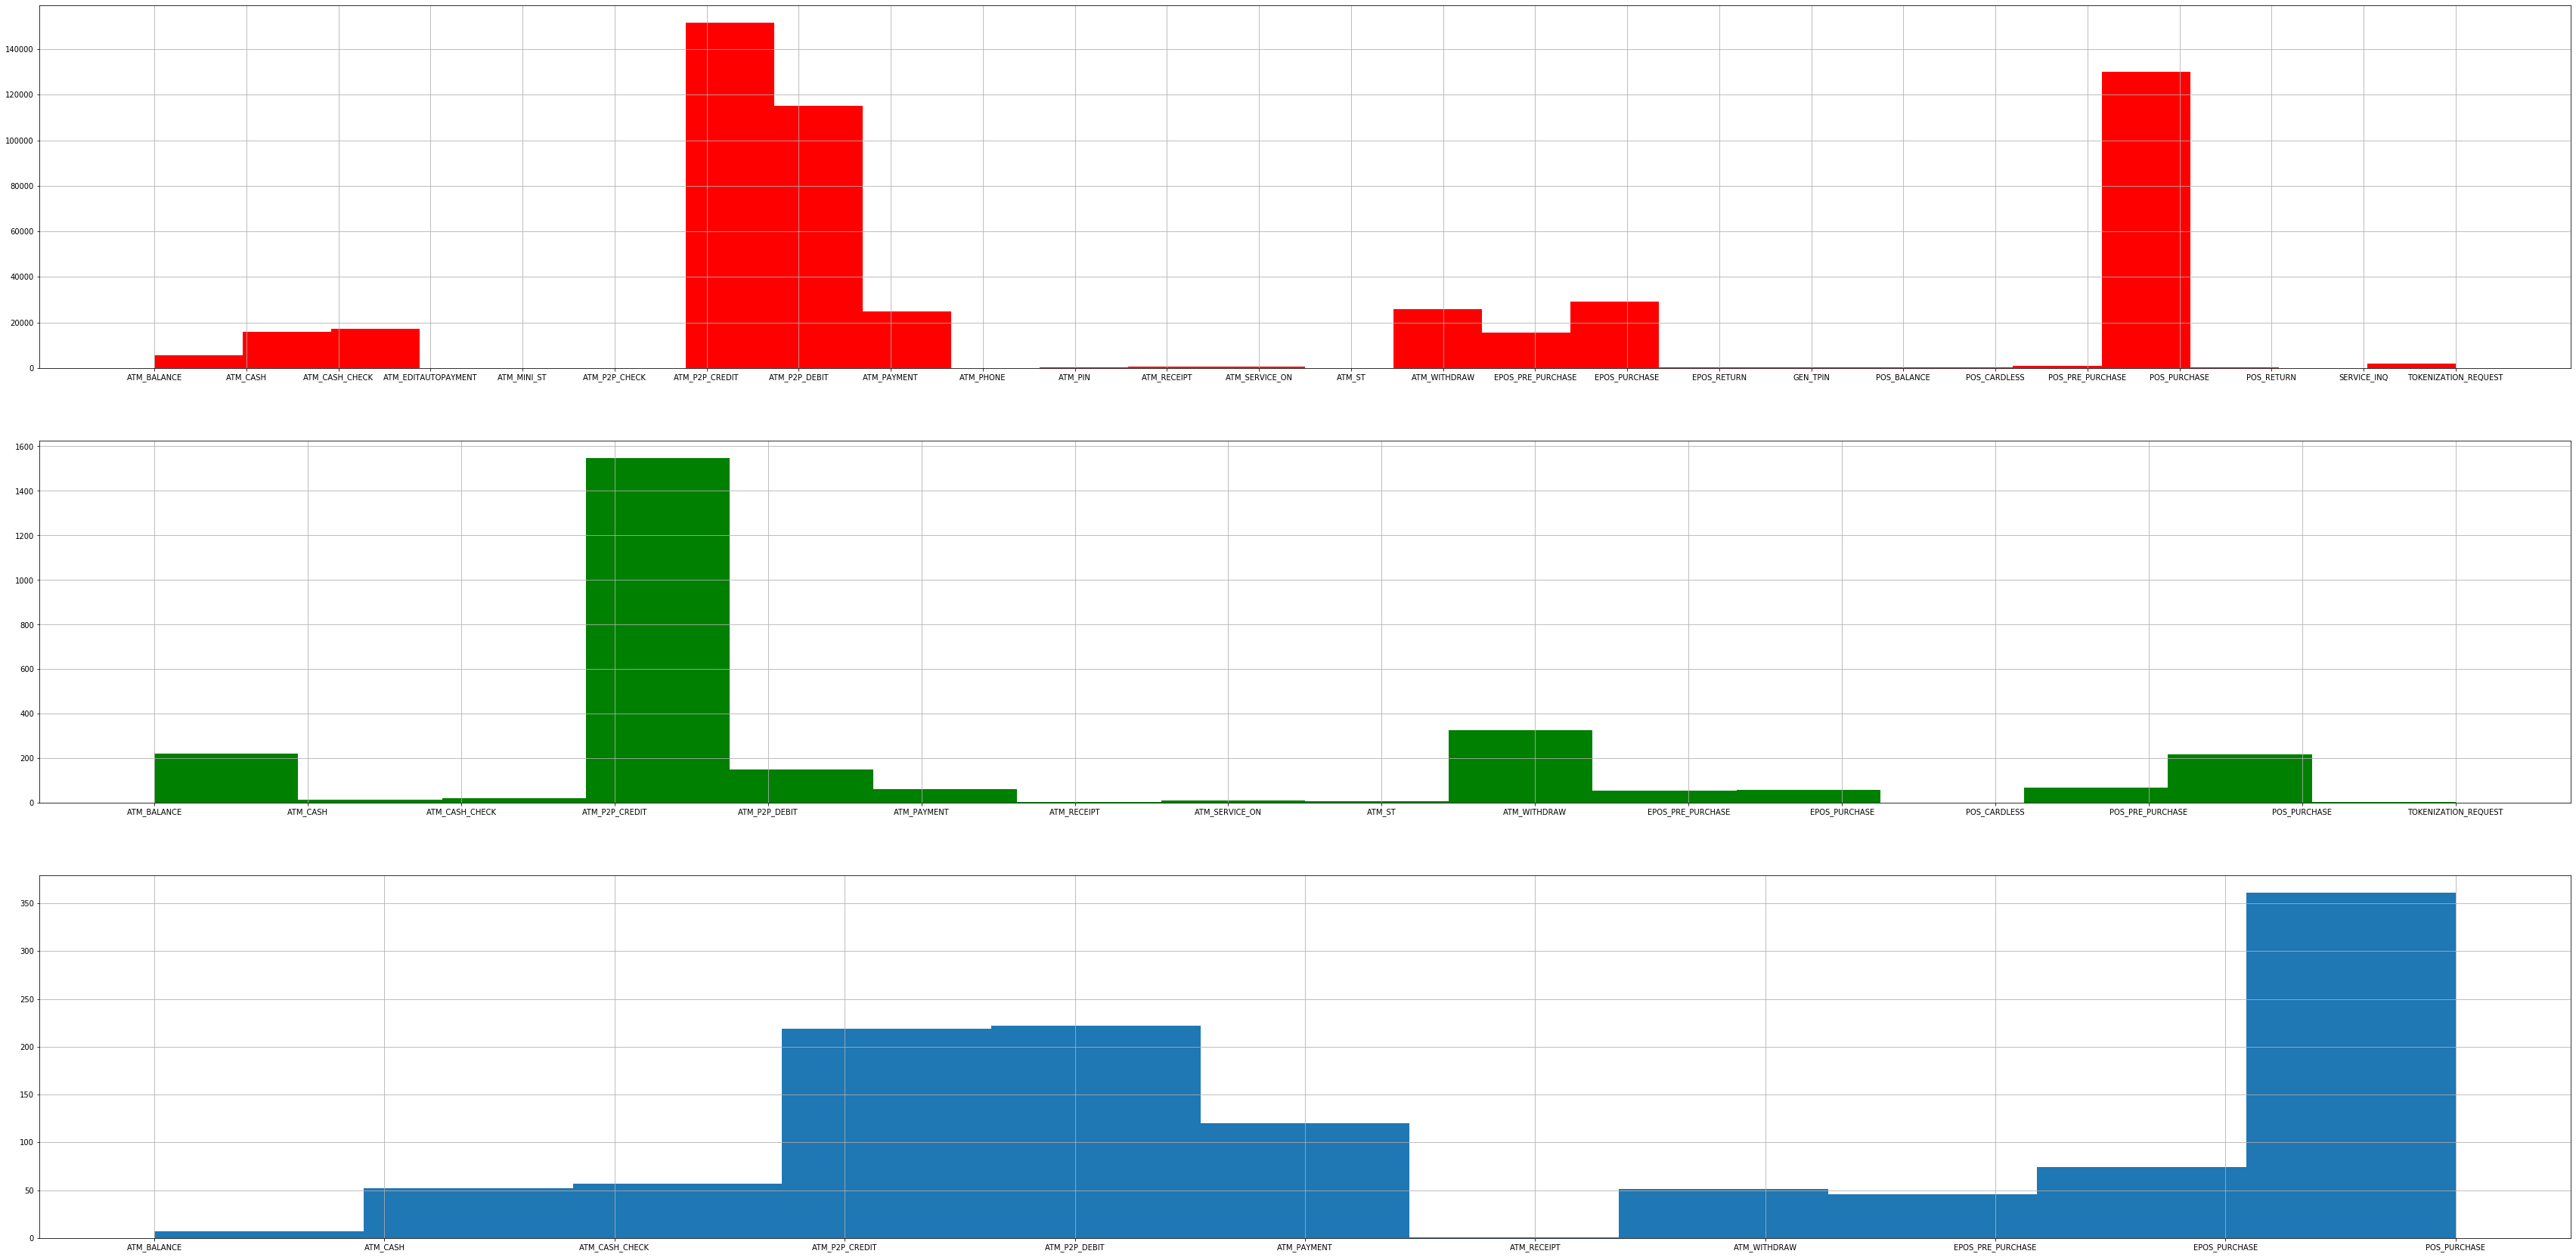

In [185]:
fig, ax = plt.subplots(nrows=3, figsize =(60, 30))
tr_gn.sub_type.sort_values().hist(color='r', ax= ax[0], bins = tr_gn.sub_type.nunique())
tr_rc_fr.sub_type.sort_values().hist(color ='g', ax = ax[1], bins = tr_rc_fr.sub_type.nunique())
tr_fr.sub_type.sort_values().hist(ax = ax[2], bins = tr_fr.sub_type.nunique())

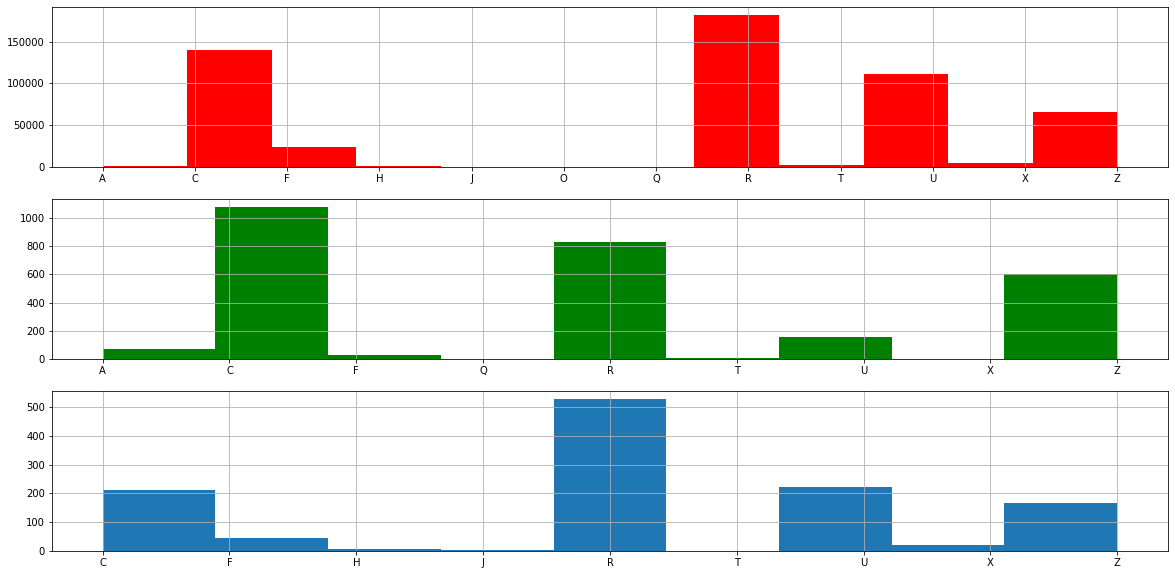

In [190]:
fig, ax = plt.subplots(nrows=3, figsize =(20, 10))
tr_gn.mcc_group.sort_values().hist(color='r', ax= ax[0], bins = tr_gn.mcc_group.nunique())
tr_rc_fr.mcc_group.sort_values().hist(color ='g', ax = ax[1], bins = tr_rc_fr.mcc_group.nunique())
tr_fr.mcc_group.sort_values().hist(ax = ax[2],bins = tr_fr.mcc_group.nunique())

### Резюмирую:
для всех 3 групп, распределения различаются достаточно сильно, прзнаки с наибольшими различиями и используем для подсчета агрегатных функций:
* event_type - deposit и payment распределенны совершенно разно в разных группах
* sub_type - ну и х там много и так видно, а писать лень
* mcc_group 

In [83]:
s1 = [(us, len(transactions[transactions.user_id == us])) for us in tr0_usrs]

### Не для всех пользователей из transaction0 есть транзакционные истории в transactions
от них придется избавиться(

In [11]:
usr_hst = set(transactions.user_id)
usr_tr = set(transactions0.user_id)
usr_tr2 = set(transactions0.rec_user_id)
a = set(transactions0[transactions0.user_id.isin(usr_tr-usr_hst)].event_id)|set(transactions0[transactions0.rec_user_id.isin(usr_tr2-usr_hst)].event_id)

Посмотрим сколько данных теряется

In [12]:
tr = transactions0[transactions0.event_id.isin(a)]
print ('потеряно ',len(tr),' объектов, которые составляют', len(tr)/float(len(transactions0)), 'от всего')
print ('потеряно ',len(tr[tr.resolution == 'G']),' объектов класса G, которые составляют', len(tr[tr.resolution == 'G'])/float(len(transactions0[transactions0.resolution=='G'])), 'от всего')
print ('потеряно ',len(tr[tr.resolution != 'G']),' объектов класса F, которые составляют', len(tr[tr.resolution != 'G'])/float(len(transactions0[transactions0.resolution!='G'])), 'от всего')

потеряно  847  объектов, которые составляют 0.09394409937888198 от всего
потеряно  838  объектов класса G, которые составляют 0.09370457340937045 от всего
потеряно  9  объектов класса F, которые составляют 0.1232876712328767 от всего


Теряется 12% фрода! ужасно
надеюсь в полной выборке такого не будет

In [13]:
transactions0 = transactions0.drop(tr.index)

In [14]:
transactions0 = transactions0.drop('Unnamed: 0', axis=1)

## Генерируем агрегатные признаки для пар пользователей
а именно следующие:


*  фиксируем время : 24, 48, 72 часа, а также менее 96, но больше 24 часов
*  фиксируем транзакционные признаки
*  для каждого зафиксированного множества строим :мощность множества, суммарные затраты


In [ ]:
это пиздетс

In [15]:
from datetime import datetime

In [17]:
def hours_diff(t1, t2):
    pattern = '%Y-%m-%d %H:%M:%S'
    tdelta = datetime.strptime(t1, pattern) - datetime.strptime(t2, pattern)
    return tdelta.days*24 + tdelta.seconds//3600

In [18]:
from itertools import combinations

def subsets(st):
    subsets = []
    for i in range(len(st)+1):
        for j in combinations(st,i):
            subsets.append(list(j)) 
    return subsets

In [19]:
sub_channel_condition = ['ISSUER']
event_type_conditions = ['DEPOSIT','PAYMENT']
sub_type_conditions = ['ATM_BALANCE','ATM_CASH','ATM_P2P_DEBIT', 'ATM_PAYMENT','POS_PURCHASE','EPOS_PURCHASE']
mcc_cat_conditions = ['A','U','Z']

In [20]:
sub_s_sub_channel = subsets(sub_channel_condition)
sub_s_ev_type = subsets(event_type_conditions)
sub_s_type = subsets(sub_type_conditions)
sub_s_mcc = subsets(mcc_cat_conditions)

sub_s_sub_channel.append(list(transactions.sub_channel.unique()))
sub_s_ev_type.append(list(transactions.event_type.unique()))
sub_s_type.append(list(transactions.sub_type.unique()))
sub_s_mcc.append(list(transactions.mcc_group.unique()))

for sub_s in [sub_s_sub_channel, sub_s_ev_type, sub_s_type, sub_s_mcc]:
    sub_s.remove([])

В общем идея того как эти фичи считать следующая (вроде как быстрее должно быть чем тупо в цикле, хоть все равно в цикле): у нас получается есть 2^12 разных раборов значений для признаков, для которых транзакции мы будем считать, так собственно сделаем для них маски


In [22]:
masks = []

for sub_ch in sub_s_sub_channel:
    for ev_t in sub_s_ev_type:
        for s_t in sub_s_type:
            for mcc in sub_s_mcc:
                masks.append(transactions.sub_channel.isin(sub_ch)&
                           transactions.event_type.isin(ev_t)&
                           transactions.sub_type.isin(s_t)&
                           transactions.mcc_group.isin(mcc))

In [27]:
print(len(masks[0])*len(masks)/2**20, 'мб занимает эта хуета')

2197.2265625 мб занимает эта хуета


In [259]:
agg_features = []

for ev_id,us_id, rec_us_id, d_t in transactions0[['event_id','user_id','rec_user_id','date_time']].values:
    us_mask24 = transactions[['user_id','date_time']].apply(lambda x: True if x[0] in [us_id, rec_us_id] and 
                                                            diff(d_t,x[1])<=24 and 
                                                            diff(d_t,x[1])>=0, axis = 1)
    us_mask48 = transactions[['user_id','date_time']].apply(lambda x: True if x[0] in [us_id, rec_us_id] and 
                                                            diff(d_t,x[1])<=48 and 
                                                            diff(d_t,x[1])>=0, axis = 1)
    us_mask72 = transactions[['user_id','date_time']].apply(lambda x: True if x[0] in [us_id, rec_us_id] and 
                                                            diff(d_t,x[1])<=72 and 
                                                            diff(d_t,x[1])>=0, axis = 1)
    us_mask96 = transactions[['user_id','date_time']].apply(lambda x: True if x[0] in [us_id, rec_us_id] and 
                                                            diff(d_t,x[1])<=96 and 
                                                            diff(d_t,x[1])>=24, axis = 1)
    features = []
    features.append(ev_id)
    for cat_mask in masks:
        for time_mask in [us_mask24,us_mask48,us_mask72,us_mask96]
            mask = time_mask&cat_mask
            features.append(transactions[mask].groupby('user_id').agg(['sum','count']).amount.values.ravel())
    agg_features.append(features)

'2018-12-07 07:56:49'

## Восстановим распределение времени  покупок в течении дня
Распрделение для каждого пользователя будем приближать распределением Мизеса-Фишера, которое является переодическим аналогом нормального распределения, параметры считаются следующим образом:
$$D\sim Vonmises(\mu, \frac{1}{\sigma})$$

$$\mu = 2\arctan(\frac{\sum_{t_j\in D}\sin(t_j)}{\sqrt{(\sum_{t_j\in D}\sin(t_j))^2+(\sum_{t_j\in D}\cos(t_j))^2}+(\sum_{t_j\in D}\cos(t_j))^2})$$
$$\sigma = \sqrt{\ln{\frac{1}{(\frac{1}{N}\sum_{t_j\in D}\sin(t_j))^2+(\frac{1}{N}\sum_{t_j\in D}\cos(t_j))^2}}}$$

Далее, строю доверительные интервалы и смотрю, попадает ли туда наше значение.


/TODO Еще можно по дням недели восстановить распределения, все-таки транзакции по воскресениям могут сильно различаться от тех что по средам. Также можно посчитать,параметры по последним 24 часам и по тем что были позже этим 24 часов и проверить гипотезы о равенстве параметров, получившийся p-value - новый признак

ЗЫ меня беспокоет, что если считать распределение по всем транзакциям, то ,тк они не размеченны, есть шанс учесть в распределении и мошеннеческие транзакции. Может стоит обрезать,например, первые n транзакций? Или вычислять это n... Жду советов

In [46]:
from scipy.stats import vonmises_line

In [48]:
def calculate_hours(time_list):
    
    '''Функция возвращает список моментов времени в часах, от 0:00, отображенный на отрезок [0;2Pi]'''
    
    pattern = '%Y-%m-%d %H:%M:%S'
    starting_time = datetime.strptime('2019-01-01 0:0:0', pattern)
    dtime_list = []
    for time in time_list:
        d = starting_time - datetime.strptime(time, pattern)
        dtime_list.append(d.seconds/3600)
    return np.array(dtime_list)/12*np.pi
    #return dtime_list

In [49]:
def calculate_periodic_mean(dtime_list):
    dtime_list = np.array(dtime_list)
    sin = np.sin(dtime_list).sum()
    cos = np.cos(dtime_list).sum()
    mean = sin/(np.sqrt(np.power(sin,2)+np.power(cos,2))+cos)
    return 2*np.arctan(mean)

In [50]:
def calculate_periodic_std(dtime_list):
    dtime_list = np.array(dtime_list)
    sin = np.sin(dtime_list).mean()
    cos = np.cos(dtime_list).mean()
    std = np.sqrt(np.log(1/(np.power(sin,2)+np.power(cos,2))))
    return std

In [509]:
time_fetures = np.zeros((transactions0.shape[0], 20), dtype=np.float128)
for user in enumerate(usrs):
    i = user[0]
    dt1 = calculate_hours(transactions[transactions.user_id == user[1][0]].date_time)
    dt2 = calculate_hours(transactions[transactions.user_id == user[1][1]].date_time)
    mean1 = calculate_periodic_mean(dt1)
    std1 = calculate_periodic_std(dt1)
    mean2 = calculate_periodic_mean(dt2)
    std2 = calculate_periodic_std(dt2)
    vonms1 = vonmises_line(kappa = 1/std1, loc= mean1)
    vonms2 = vonmises_line(kappa = 1/std2, loc = mean2)
    time_fetures[i][0] = mean1
    time_fetures[i][1] = std1
    time_fetures[i][10] = mean2
    time_fetures[i][11] = std2
    for alpha in enumerate([0.9,0.8,0.7,0.6]):
        inter1 = vonms1.interval(alpha[1])
        inter2 = vonms2.interval(alpha[1])
        time_fetures[i][2+2*alpha[0]] = inter1[0]
        time_fetures[i][2+2*alpha[0]+1] = inter1[1]
        time_fetures[i][12+2*alpha[0]] = inter2[0]
        time_fetures[i][12+2*alpha[0]+1] = inter2[1]

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:6724: RuntimeWarning: divide by zero encountered in true_divide
  return _stats.von_mises_cdf(kappa, x)
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


In [9]:
time_fetures = pd.read_pickle('alf.pkl')
time_fetures.head()

mu1      std1  alpha1_l_0.9  alpha1_r_0.9  alpha1_l_0.8  alpha1_r_0.8  \
0  2.373196  1.031969      0.136550      4.609841      0.693829      4.052562   
1  3.012235  0.710980      1.181126      4.843344      1.671659      4.352811   
2 -2.140792  0.002036     -2.215051     -2.066533     -2.198644     -2.082940   
3 -2.176786  0.801601     -4.151356     -0.202216     -3.626517     -0.727055   
4 -3.000383  1.395395     -5.453463     -0.547302     -4.920052     -1.080714   

   alpha1_l_0.7  alpha1_r_0.7  alpha1_l_0.6  alpha1_r_0.6       mu2      std2  \
0      1.057580      3.688812      1.328508      3.417884  2.449570  0.000000   
1      1.962768      4.061702      2.176857      3.847614 -1.873205  0.609098   
2     -2.187576     -2.094007     -2.178781     -2.102802  3.001643  0.588725   
3     -3.309804     -1.043767     -3.077239     -1.276332 -2.719502  0.731645   
4     -4.525177     -1.475589     -4.217027     -1.783739 -2.648545  1.254632   

   alpha2_l_0.9  alpha2_r_0.9  alpha2_l_0.8  alpha2_r_0.8  alpha2_l_0.7  \
0      2.449570      2.449570      2.449570      2.449570      2.449570   
1     -3.515796     -0.230613     -3.079771     -0.666638     -2.821405   
2      1.399622      4.603664      1.823087      4.180200      2.074531   
3     -4.585453     -0.853550     -4.085861     -1.353143     -3.788587   
4     -5.036828     -0.260262     -4.489816     -0.807274     -4.102348   

   alpha2_r_0.7  alpha2_l_0.6  alpha2_r_0.6  
0      2.449570      2.449570      2.449570  
1     -0.925004     -2.629988     -1.116421  
2      3.928756      2.261223      3.742064  
3     -1.650417     -3.570131     -1.868872  
4     -1.194741     -3.805729     -1.491360

In [55]:
transactions0.head()

event_id   user_id  rec_user_id  \
0  0fcea7fec4ff479cac8cf37b4555c817  75301207     49913000   
1  c29a4e64d27b435b9b55aa3e62ce54d4   1200695     12797310   
2  3107b2b1afcb490ab0a31135eb4b386c  45657780     23814017   
3  d9bc95d991144d53b950d8084fa846bf  21683486      9865131   
4  9fc959da4cd144ea8bf5bae2dc041a5e   4531894  VSP15472255   

             date_time resolution sub_channel  
0  2018-12-07 07:56:49          G      ATMAPI  
1  2018-12-07 07:14:41          G   MOBILEAPI  
2  2018-12-07 14:02:30          G   MOBILEAPI  
3  2018-12-07 10:32:41          G      WEBAPI  
4  2018-12-07 18:22:52          G   MOBILEAPI

### Также, восстановим распределение не для каждого, а для всех genue и fraud пользователей

In [51]:
scl = 12/np.pi

genue_usrs = transactions0[transactions0.resolution=='G'][['user_id', 'rec_user_id']].values.ravel()
fraud_usrs = transactions0[transactions0.resolution!='G'].user_id
rec_fraud_usrs = transactions0[transactions0.resolution!='G'].rec_user_id

genue_hours = calculate_hours(transactions[transactions.user_id.isin(genue_usrs)].date_time)
fraud_hours = calculate_hours(transactions[transactions.user_id.isin(fraud_usrs)].date_time)
rec_fraud_hours = calculate_hours(transactions[transactions.user_id.isin(rec_fraud_usrs)].date_time)

genue_distr = vonmises_line(kappa = 1/calculate_periodic_std(genue_hours), loc= calculate_periodic_mean(genue_hours))
fraud_distr = vonmises_line(kappa = 1/calculate_periodic_std(fraud_hours), loc= calculate_periodic_mean(fraud_hours))
rec_fraud_distr = vonmises_line(kappa = 1/calculate_periodic_std(rec_fraud_hours), loc= calculate_periodic_mean(rec_fraud_hours))

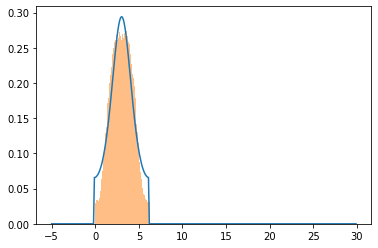

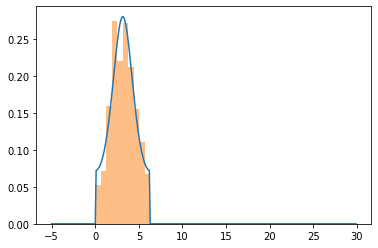

(array([0.08977148, 0.15940192, 0.21579682, 0.33491667, 0.22788145,
        0.16573196, 0.15537371, 0.08056415, 0.09782789, 0.06732861]),
 array([3.92699082e-03, 6.31045608e-01, 1.25816422e+00, 1.88528284e+00,
        2.51240146e+00, 3.13952008e+00, 3.76663869e+00, 4.39375731e+00,
        5.02087593e+00, 5.64799454e+00, 6.27511316e+00]),
 <a list of 10 Patch objects>)

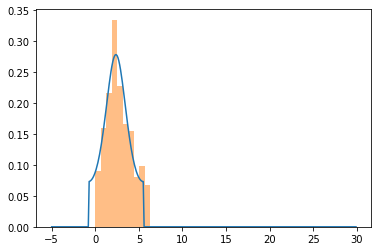

In [489]:
x = np.arange(-5,30,0.1)
plt.plot(x,genue_distr.pdf(x))
plt.hist(genue_hours,density=True, alpha=0.5, bins= 200)
plt.show()
plt.plot(x,fraud_distr.pdf(x-2*np.pi))
plt.hist(fraud_hours,density=True, alpha=0.5, bins= 10)
plt.show()
plt.plot(x,rec_fraud_distr.pdf(x))
plt.hist(rec_fraud_hours,density=True, alpha=0.5, bins= 10)

Среднее для мошенников и нормальных людей ну явно различается, получается можно использовать как еще одни признаки попадание в предсказательный интервал для данного распределения

## Фичи на основе скрытых марковских моделей
Считаем что количество потраченных денег или разность во времени между соседними транзакциями это наблюдаемые состояния, на их основе будем моделировать процесс. Далее будем считать правдоподобие транзакционной истории.
Считаем на основе транзакций:
* С карт не мошеннических пользователей
* С карт мошенников
* С карт попавших в руки мошенников

In [36]:
from hmmlearn import hmm

In [52]:
genue_lenghts = transactions[transactions.user_id.isin(genue_usrs)].groupby('user_id').user_id.count().values
genue_amounts = transactions[transactions.user_id.isin(genue_usrs)].sort_values(by='user_id').amount.values
genue_amounts = genue_amounts.reshape((len(genue_amounts),1))

fraud_lenghts = transactions[transactions.user_id.isin(fraud_usrs)].groupby('user_id').user_id.count().values
fraud_amounts = transactions[transactions.user_id.isin(fraud_usrs)].sort_values(by='user_id').amount.values
fraud_amounts = fraud_amounts.reshape((len(fraud_amounts),1))

rec_fraud_lenghts = transactions[transactions.user_id.isin(rec_fraud_usrs)].groupby('user_id').user_id.count().values
rec_fraud_amounts = transactions[transactions.user_id.isin(rec_fraud_usrs)].sort_values(by='user_id').amount.values
rec_fraud_amounts = rec_fraud_amounts.reshape((len(rec_fraud_amounts),1))

#### Посмотрим сколько компонент стоит использовать

In [115]:
plt.hist(genue_amounts, range=(0,1000), bins=100, density=True)
plt.show()

получилось некоторое говно

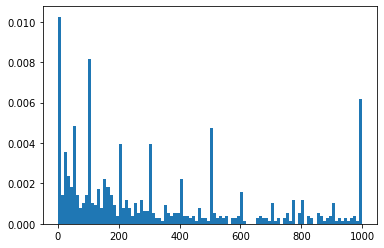

In [116]:
plt.hist(fraud_amounts, range=(0,1000), bins=100,density=True)
plt.show()

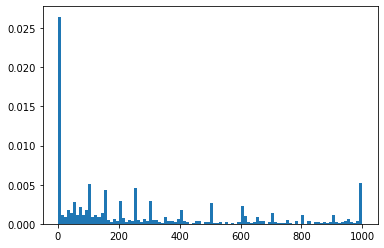

In [117]:
plt.hist(rec_fraud_amounts, range=(0,1000), bins=100,density=True)
plt.show()

Если честно, то вообще не похоже на смесь нормальных распределенй, надо попробовать разбить на интервалы и смотреть распределение по ним

### Предполагаем что распределения нормальные

In [118]:
genue_hmm = hmm.GaussianHMM(n_components=10, covariance_type="full", n_iter=100)
genue_hmm.fit(genue_amounts, genue_lenghts)

GaussianHMM(algorithm='viterbi', covariance_type='full', covars_prior=0.01,
            covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
            min_covar=0.001, n_components=10, n_iter=100, params='stmc',
            random_state=None, startprob_prior=1.0, tol=0.01,
            transmat_prior=1.0, verbose=False)

In [113]:
fraud_hmm = hmm.GaussianHMM(n_components=10, covariance_type="full", n_iter=1000)
fraud_hmm.fit(fraud_amounts, fraud_lenghts)

GaussianHMM(algorithm='viterbi', covariance_type='full', covars_prior=0.01,
            covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
            min_covar=0.001, n_components=10, n_iter=1000, params='stmc',
            random_state=None, startprob_prior=1.0, tol=0.01,
            transmat_prior=1.0, verbose=False)

In [114]:
rec_fraud_hmm = hmm.GaussianHMM(n_components=10, covariance_type="full", n_iter=1000)
rec_fraud_hmm.fit(rec_fraud_amounts, rec_fraud_lenghts)

GaussianHMM(algorithm='viterbi', covariance_type='full', covars_prior=0.01,
            covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
            min_covar=0.001, n_components=10, n_iter=1000, params='stmc',
            random_state=None, startprob_prior=1.0, tol=0.01,
            transmat_prior=1.0, verbose=False)

In [168]:
likehoods = []
for hmm in [genue_hmm, fraud_hmm, rec_fraud_hmm]:
    likehood = []
    for sample in zip([genue_amounts,fraud_amounts,rec_fraud_amounts],[genue_lenghts,fraud_lenghts,rec_fraud_lenghts]):
        likehood_s = []
        cum = 0
        for l in sample[1]:
            likehood_s.append(hmm.score(sample[0][cum:cum+l]))
            cum+=l
        likehood.append(likehood_s)
    likehoods.append(likehood)

In [37]:
def likehood_statistic(likehoods, range_ = (-3000,10)):
    for likehood in likehoods:
        likehood_g = np.array(likehood[0])
        likehood_f = np.array(likehood[1])
        likehood_r_f = np.array(likehood[2])
        print(likehood_g.mean(),likehood_g.std())
        print(likehood_f.mean(),likehood_f.std())
        print(likehood_r_f.mean(),likehood_r_f.std())
        print('---------')
    
    fig, ax = plt.subplots(ncols=3,nrows=3,figsize = (20,20))
    for i in range(3):
        for j in range(3):
            ax[i][j].hist(likehoods[i][j],
                          density=True,range= range_,
                          bins = 7*int(np.log(len(likehoods[i][j]))),
                         log = False)

-352.6467585125818 683.5885057633388
-204.68899430756707 177.7588223258147
-555.1430062828881 976.7646553631048
---------
-857.9646017755798 30833.211048859448
-195.7610767512327 171.16713562674636
-616.9266195340293 1156.2129298145544
---------
-472.27873334116157 7895.7427086323305
-208.61038210633058 182.59117395162963
-542.498368289025 928.726742976025
---------


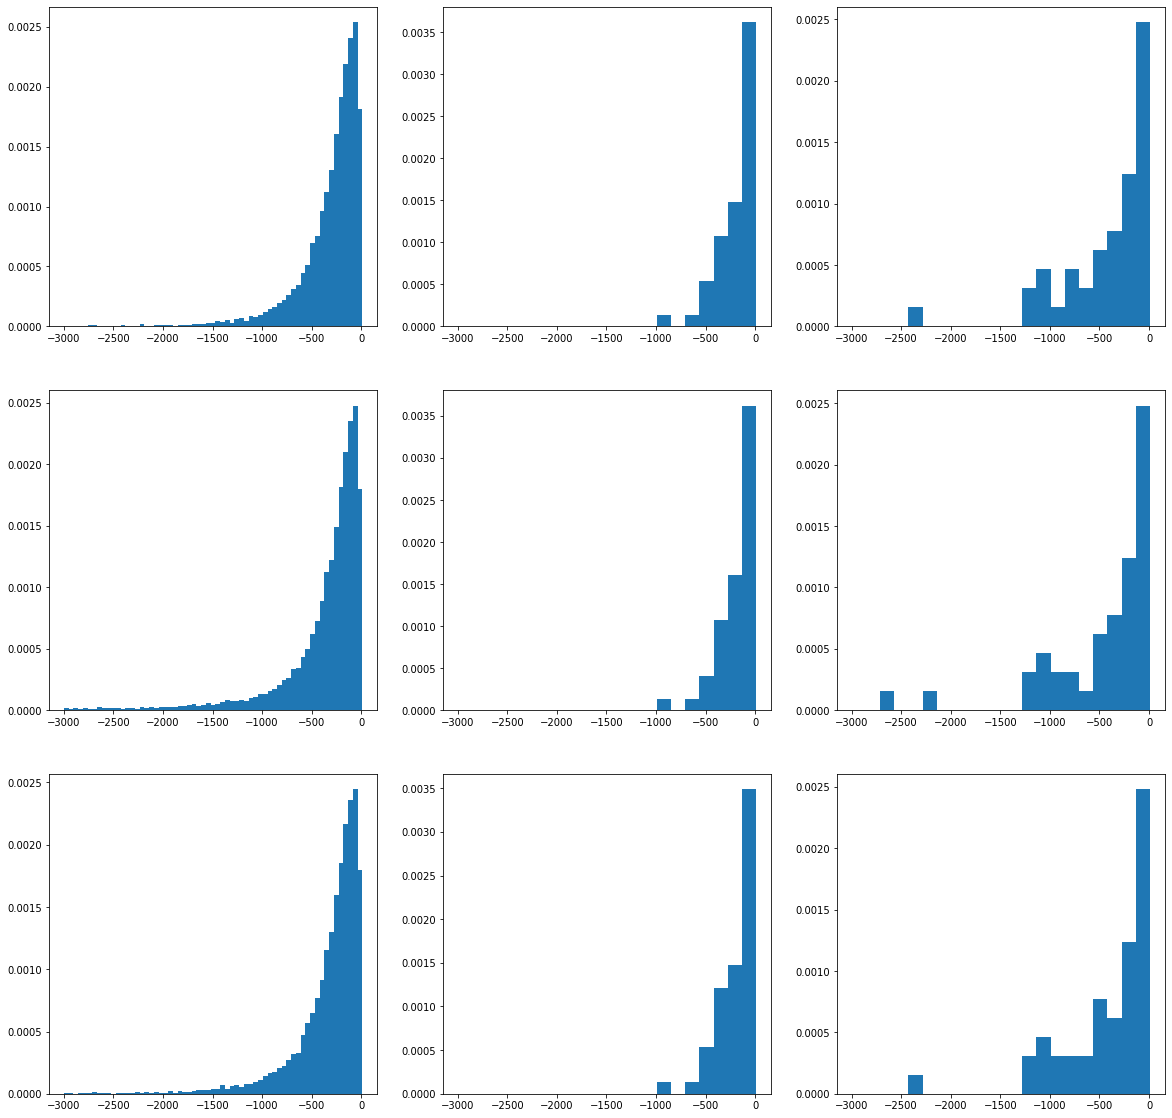

In [169]:
likehood_statistic(likehoods)

### Попробуем разбить цены на интервалы 
* до 10 рублей
* от 10 до 100
* от 100 до 1000
* от 1000 до 5000
* от 5000 до 10000
* от 10000 до 30000
* от 30000 до 50000
* от 50000

In [53]:
cat = [10,100,1000,5000,10000,30000,50000]
genue_amounts_cat = np.searchsorted(cat, genue_amounts)
fraud_amounts_cat = np.searchsorted(cat, fraud_amounts)
rec_fraud_amounts_cat = np.searchsorted(cat, rec_fraud_amounts)

In [ ]:
exp_hmm = hmm.MultinomialHMM

In [54]:

genue_cat_hmm = hmm.MultinomialHMM(n_components=100, n_iter=100,)
genue_cat_hmm.fit(genue_amounts_cat, genue_lenghts)

fraud_cat_hmm = hmm.MultinomialHMM(n_components=100, n_iter=1000)
fraud_cat_hmm.fit(fraud_amounts_cat, fraud_lenghts)

rec_fraud_cat_hmm = hmm.MultinomialHMM(n_components=10, n_iter=1000)
rec_fraud_cat_hmm.fit(rec_fraud_amounts_cat, rec_fraud_lenghts)

%time

KeyboardInterrupt: 

In [176]:
rec_fraud_cat_hmm = hmm.MultinomialHMM(n_components=100, n_iter=100)
rec_fraud_cat_hmm.fit(rec_fraud_amounts_cat, rec_fraud_lenghts)

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T


MultinomialHMM(algorithm='viterbi', init_params='ste', n_components=100,
               n_iter=100, params='ste',
               random_state=RandomState(MT19937) at 0x1122B79E0,
               startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
               verbose=False)

In [178]:
lhs = []
for hmm in [rec_fraud_cat_hmm]:
    likehood = []
    for sample in zip([genue_amounts_cat,fraud_amounts_cat,rec_fraud_amounts_cat],[genue_lenghts,fraud_lenghts,rec_fraud_lenghts]):
        likehood_s = []
        cum = 0
        for l in sample[1]:
            likehood_s.append(hmm.score(sample[0][cum:cum+l]))
            cum+=l
        likehood.append(likehood_s)
    lhs.append(likehood)

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

-83.08775736081373 119.2214635601342
-49.996462280554255 52.29482821078603
-73.18821519479177 96.58565259142554
---------


IndexError: list index out of range

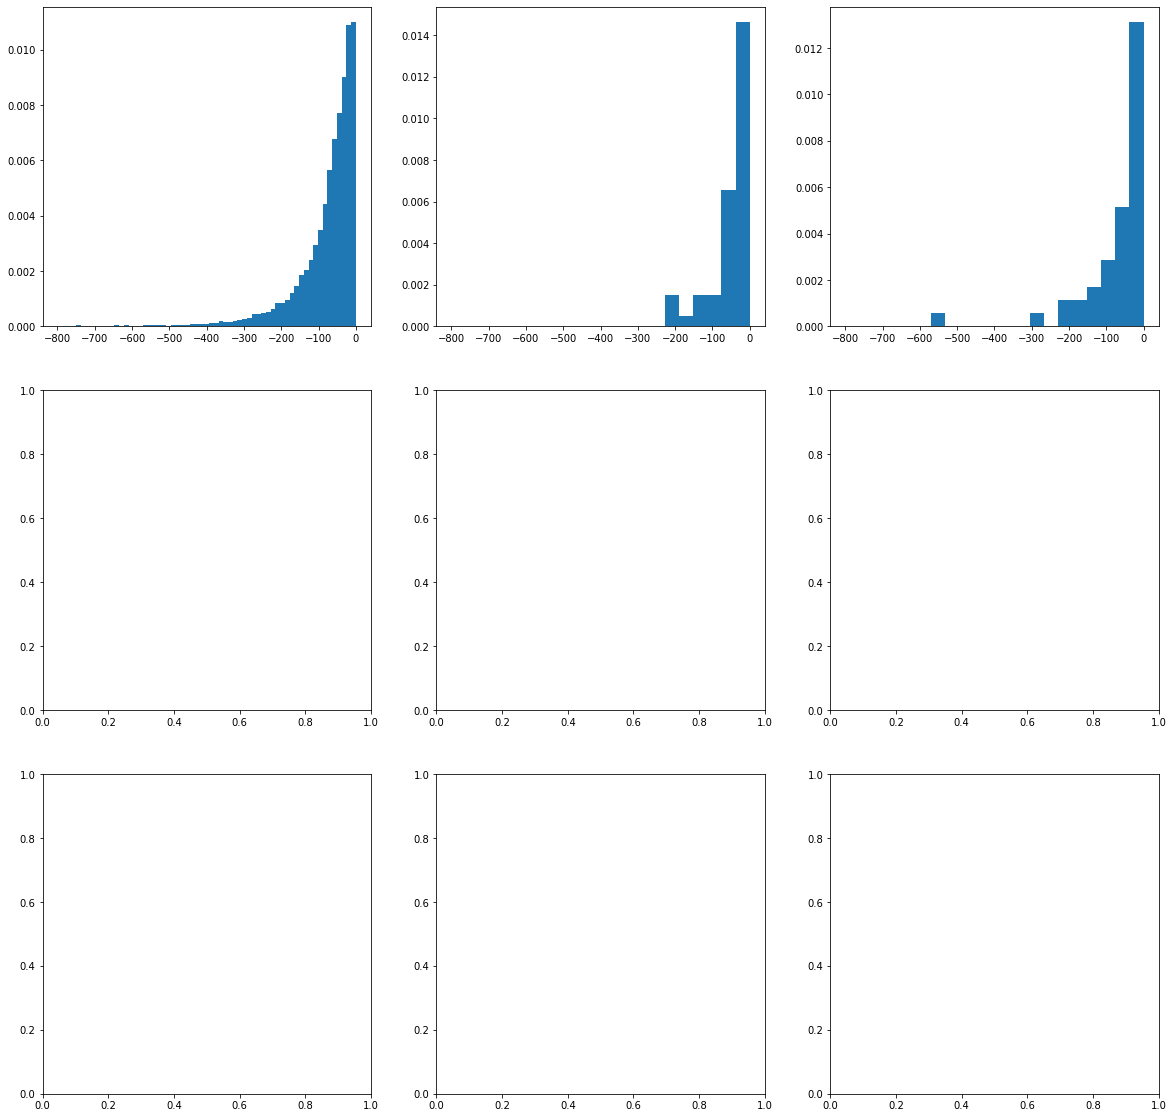

In [186]:
likehood_statistic(lhs, range_ = (-800,0))

AttributeError: 'numpy.ndarray' object has no attribute 'med'

In [163]:
likehoods_cat = []
for hmm in [genue_cat_hmm, fraud_cat_hmm, rec_fraud_cat_hmm]:
    likehood = []
    for sample in zip([genue_amounts_cat,fraud_amounts_cat,rec_fraud_amounts_cat],[genue_lenghts,fraud_lenghts,rec_fraud_lenghts]):
        likehood_s = []
        cum = 0
        for l in sample[1]:
            likehood_s.append(hmm.score(sample[0][cum:cum+l]))
            cum+=l
        likehood.append(likehood_s)
    likehoods_cat.append(likehood)

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/valerka_bvv/anaconda2/envs/py37/lib/python3.7/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/Users/val

-59.71176975954415 82.7434573670161
-36.78118560210077 33.24300296849726
-88.57124871700955 114.84938926796977
---------
-65.95672473871919 104.55081921219193
-34.52077818699946 31.523363855366174
-101.36568956911286 150.30316453901622
---------
-64.94826382744259 91.2833360545626
-39.25432064198553 36.53690243297976
-83.33950018276641 106.70007209726637
---------


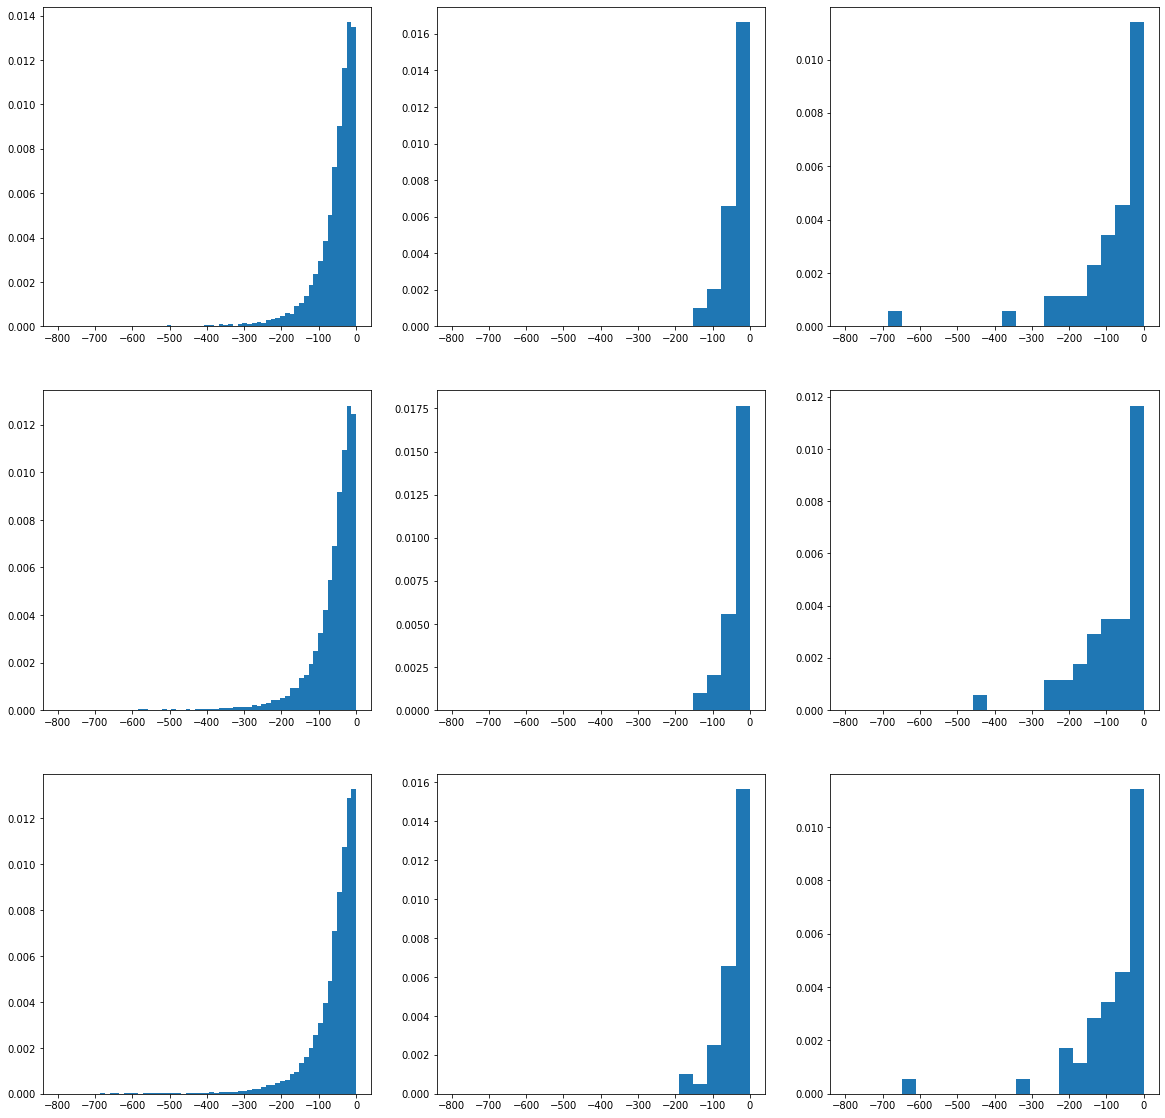

In [174]:
likehood_statistic(likehoods_cat, range_ = (-800,0))